# Kaggle - TMDB 

### Extract tables

**Here I will extract data from some of the fields in the raw data (e.g. average revenue by actor) and store it in `.csv` files**

**Edit: I decided to use the log of the revenue, and will update the table accordingly**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import math

In [69]:
MILLION = 1000000

In [70]:
train = pd.read_csv('train.csv')

In [71]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

### belong_to_collection

In [72]:
train[train['belongs_to_collection'].notna()]['belongs_to_collection'].map(lambda x: len(ast.literal_eval(x))).unique()

array([1])

All lists have 1 element

In [73]:
dicts = train[train['belongs_to_collection'].notna()]['belongs_to_collection'].map(
    lambda x: ast.literal_eval(x)[0]).values

In [74]:
dicts[0]

{'id': 313576,
 'name': 'Hot Tub Time Machine Collection',
 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg',
 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}

In [75]:
# get all collections
collections = [d['id'] for d in dicts]

In [76]:
uniq,counts = np.unique(np.array(collections),return_counts=True)

In [77]:
counts

array([ 2,  3,  2,  3,  2,  3,  2,  3,  1,  1,  2,  2,  1,  2,  1, 16,  2,
        1,  2,  6,  1,  2,  1,  4,  2,  3,  2,  1,  3,  2,  1,  2,  1,  1,
        2,  2,  1,  1,  2,  3,  1,  3,  4,  1,  2,  4,  4,  2,  1,  4,  2,
        2,  1,  2,  1,  1,  5,  1,  4,  2,  1,  3,  7,  1,  1,  2,  1,  1,
        4,  2,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  2,  1,  1,  1,  4,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  2,  5,  1,
        4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,
        2,  2,  2,  1,  2,  1,  2,  2,  1,  1,  2,  1,  3,  1,  1,  1,  2,
        3,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  3,  1,  2,  1,
        1,  1,  1,  1,  2,  1,  3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  2,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  1

In [78]:
counts[9], uniq[9]

(1, 328)

In [79]:
[d for d in dicts if d['id']==328]

[{'id': 328,
  'name': 'Jurassic Park Collection',
  'poster_path': '/qIm2nHXLpBBdMxi8dvfrnDkBUDh.jpg',
  'backdrop_path': '/pJjIH9QN0OkHFV9eue6XfRVnPkr.jpg'}]

Some collections seem to only have 1 item in them. Perhaps the other items are in the test set?

In [80]:
test = pd.read_csv('test.csv')

In [81]:
test[test['belongs_to_collection'].fillna('[{"id":-1}]').map(lambda x: (ast.literal_eval(x))[0]['id'])==328]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
883,3884,"[{'id': 328, 'name': 'Jurassic Park Collection...",73000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,tt0119567,en,The Lost World: Jurassic Park,Four years after Jurassic Park's genetically b...,0.788123,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Something has survived.,The Lost World: Jurassic Park,"[{'id': 911, 'name': 'exotic island'}, {'id': ...","[{'cast_id': 1, 'character': 'Dr. Ian Malcolm'...","[{'credit_id': '52fe4238c3a36847f800d3ad', 'de..."
1934,4935,"[{'id': 328, 'name': 'Jurassic Park Collection...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,tt0369610,en,Jurassic World,Twenty-two years after the events of Jurassic ...,32.790475,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6/9/15,124.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The park is open.,Jurassic World,"[{'id': 1299, 'name': 'monster'}, {'id': 1718,...",NaN,NaN
4213,7214,"[{'id': 328, 'name': 'Jurassic Park Collection...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,tt0163025,en,Jurassic Park III,"In need of funds for research, Dr. Alan Grant ...",0.648867,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7/18/01,92.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"This time, it's not just a walk in the park!",Jurassic Park III,"[{'id': 911, 'name': 'exotic island'}, {'id': ...","[{'cast_id': 1, 'character': 'Dr. Alan Grant',...","[{'credit_id': '52fe4238c3a36847f800d479', 'de..."


Indeed

**I will include collections with only 1 item as well**

In [82]:
# get all revenues for each collection

In [85]:
# without log:
revenues = []
stdevs = []
for collection in uniq:
    # select all movies from this collections
    revenues.append(train[train['belongs_to_collection'].fillna('[{"id":-1}]').map(
        lambda x: (ast.literal_eval(x))[0]['id'])==collection]['revenue'].mean())
    stdevs.append(train[train['belongs_to_collection'].fillna('[{"id":-1}]').map(
        lambda x: (ast.literal_eval(x))[0]['id'])==collection]['revenue'].std())

KeyboardInterrupt: 

In [ ]:
before_log = np.array(revenues)

check one at random to make sure it was correctly computed

In [17]:
uniq[0], uniq[77],uniq[-1]

(10, 12087, 479888)

In [18]:
train[train['belongs_to_collection'].fillna('[{"id":-1}]').map(
        lambda x: (ast.literal_eval(x))[0]['id'])==10]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
689,690,"[{'id': 10, 'name': 'Star Wars Collection', 'p...",113000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.starwars.com/films/star-wars-episod...,tt0121766,en,Star Wars: Episode III - Revenge of the Sith,"Years after the onset of the Clone Wars, the n...",13.165421,...,5/17/05,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The saga is complete.,Star Wars: Episode III - Revenge of the Sith,"[{'id': 797, 'name': 'showdown'}, {'id': 10013...","[{'cast_id': 13, 'character': 'Obi-Wan Kenobi'...","[{'credit_id': '52fe431fc3a36847f803bea3', 'de...",850000000
1818,1819,"[{'id': 10, 'name': 'Star Wars Collection', 'p...",120000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,tt0121765,en,Star Wars: Episode II - Attack of the Clones,"Ten years after the invasion of Naboo, the gal...",14.072511,...,5/15/02,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Jedi Shall Not Know Anger. Nor Hatred. Nor L...,Star Wars: Episode II - Attack of the Clones,"[{'id': 1399, 'name': 'senate'}, {'id': 5340, ...","[{'cast_id': 7, 'character': 'Obi Wan Kenobi',...","[{'credit_id': '52fe431fc3a36847f803bd8b', 'de...",649398328


In [19]:
(850000000 + 649398328)/2 / MILLION

749.699164

In [20]:
revenues[0] / MILLION

749.699164

In [21]:
train[train['belongs_to_collection'].fillna('[{"id":-1}]').map(
        lambda x: (ast.literal_eval(x))[0]['id'])==12087]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1862,1863,"[{'id': 12087, 'name': 'Herbie Collection', 'p...",50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,tt0400497,en,Herbie Fully Loaded,"Maggie Peyton, the new owner of Number 53 - th...",9.35239,...,6/22/05,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Start your engines...,Herbie Fully Loaded,"[{'id': 830, 'name': 'car race'}, {'id': 6067,...","[{'cast_id': 1, 'character': 'Maggie Peyton', ...","[{'credit_id': '59620742925141790403a4fe', 'de...",66002004


In [22]:
revenues[77]

66002004.0

In [23]:
train[train['belongs_to_collection'].fillna('[{"id":-1}]').map(
        lambda x: (ast.literal_eval(x))[0]['id'])==479888]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2891,2892,"[{'id': 479888, 'name': 'The Thing Collection'...",35000000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",http://www.uphe.com/movies/the-thing-2011,tt0905372,en,The Thing,When paleontologist Kate Lloyd travels to an i...,10.169411,...,10/12/11,103.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,It's Not Human. Yet.,The Thing,"[{'id': 2340, 'name': 'paranoia'}, {'id': 4713...","[{'cast_id': 2, 'character': 'Kate Lloyd', 'cr...","[{'credit_id': '537b713fc3a3682d3c00000e', 'de...",28128670


In [24]:
revenues[-1]

28128670.0

In [25]:
train[train['belongs_to_collection'].fillna('[{"id":-1}]').map(
        lambda x: (ast.literal_eval(x))[0]['id'])==10]['revenue'].std()

141846802.58855957

In [26]:
sss = [s if s>-float('inf') else 0 for s in stdevs]

In [27]:
pd.DataFrame(np.matrix((revenues,sss)).T,index=uniq,columns=['average_revenue','stdev'],dtype=int).to_csv('collections.csv')

### genres

In [28]:
train['genres'].fillna('[]').map(
    lambda x: len(ast.literal_eval(x))).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [29]:
# get all genre id lists
genres_lists = train['genres'].fillna('[]').map(
    lambda x: [i['id'] for i in (ast.literal_eval(x))]).values

all_genres = []
for l in genres_lists:
    # add all lists together
    all_genres.extend(l)
# keep only uniques
all_genres = set(all_genres)
# convert back to list
all_genres = list(all_genres)

In [30]:
all_genres

[10752,
 10402,
 35,
 99,
 37,
 36,
 12,
 878,
 14,
 16,
 80,
 18,
 9648,
 10769,
 53,
 10770,
 27,
 28,
 10749,
 10751]

In [31]:
# build genres table
revenue = []
for g in all_genres:
    revenue.append(train[train['genres'].fillna('[]').map(
        lambda x: g in [i['id'] for i in (ast.literal_eval(x))])]['revenue'].mean())

In [32]:
# build names table
names = []
for i in train['genres'].fillna('[]').map(lambda x: [(i['id'],i['name']) for i in (ast.literal_eval(x))]).values.tolist():
    names.extend(i)
names = set(names)
names = dict(names)
names

{28: 'Action',
 16: 'Animation',
 9648: 'Mystery',
 10749: 'Romance',
 80: 'Crime',
 12: 'Adventure',
 99: 'Documentary',
 10402: 'Music',
 10751: 'Family',
 53: 'Thriller',
 878: 'Science Fiction',
 14: 'Fantasy',
 10769: 'Foreign',
 27: 'Horror',
 10752: 'War',
 37: 'Western',
 36: 'History',
 10770: 'TV Movie',
 35: 'Comedy',
 18: 'Drama'}

In [33]:
ordered_names = [names[i] for i in all_genres]

In [34]:
pd.DataFrame({'name':ordered_names,'revenue':revenue},index=all_genres).to_csv('genres.csv')

### Language

In [38]:
train['original_language'].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
fa       5
da       5
ro       4
hu       3
tr       3
no       2
te       2
fi       2
pl       2
ml       2
mr       1
ar       1
vi       1
cs       1
nb       1
he       1
id       1
el       1
bn       1
ur       1
sr       1
Name: original_language, dtype: int64

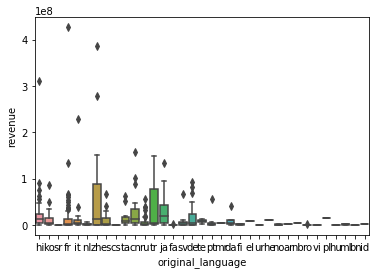

In [40]:
sns.boxplot(x='original_language',y='revenue',data=train[train['original_language']!='en'])

It appears that only the languages that have many values are of interest

In [44]:
languages = train['original_language'].value_counts()

In [52]:
for l in languages.index:
    print(l,int(train[train['original_language']==l]['revenue'].mean()/MILLION) )

en 74
fr 17
ru 6
es 8
hi 25
ja 30
it 16
ko 13
cn 29
zh 70
de 20
ta 14
sv 11
pt 10
nl 1
fa 0
da 11
ro 0
hu 0
tr 51
no 1
te 8
fi 1
pl 15
ml 1
mr 4
ar 1
vi 0
cs 0
nb 4
he 11
id 2
el 8
bn 0
ur 0
sr 0


In [53]:
train[train['original_language']=='tr']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
104,105,"[{'id': 131989, 'name': 'Recep İvedik Serisi',...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt3477064,tr,Recep İvedik 4,Recep Ivedik coaches the children football tea...,1.590383,...,2/20/14,117.0,"[{'iso_639_1': 'tr', 'name': 'Türkçe'}]",Released,NaN,Recep İvedik 4,NaN,"[{'cast_id': 2, 'character': 'Recep ƒ∞vedik', ...","[{'credit_id': '5349ae000e0a2640b60005d7', 'de...",149521495
807,808,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,tt1827487,tr,Bir zamanlar Anadolu'da,A group of men set out in search of a dead bod...,4.433261,...,9/23/11,150.0,"[{'iso_639_1': 'tr', 'name': 'Türkçe'}]",Released,NaN,Once Upon a Time in Anatolia,"[{'id': 1820, 'name': 'trip'}, {'id': 7172, 'n...","[{'cast_id': 12, 'character': 'Doktor Cemal', ...","[{'credit_id': '52fe48e3c3a368484e110295', 'de...",138730
2342,2343,"[{'id': 131989, 'name': 'Recep İvedik Serisi',...",500000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt1193516,tr,Recep İvedik,"Adamƒ±n biri yolda c√ºzdanƒ±nƒ± d√º≈ü√ºr√ºr, b...",1.640271,...,2/22/08,90.0,"[{'iso_639_1': 'tr', 'name': 'Türkçe'}]",Released,NaN,Recep İvedik,NaN,"[{'cast_id': 4, 'character': 'Recep ƒ∞vedik', ...","[{'credit_id': '52fe445a9251416c9100dc23', 'de...",5330000


This looks quite suspicious and is perhaps a typo in the data

**I'll use a dictionary to convert the languages and keep only the popular ones (and use 'other' for the rest)**

In [60]:
dict([(l,l) for l in languages[languages>10].index])

{'en': 'en',
 'fr': 'fr',
 'ru': 'ru',
 'es': 'es',
 'hi': 'hi',
 'ja': 'ja',
 'it': 'it',
 'ko': 'ko',
 'cn': 'cn',
 'zh': 'zh',
 'de': 'de',
 'ta': 'ta'}

In [67]:
l_rev = []
for l in languages[languages>10].index:
    l_rev.append((l,train[train['original_language']==l]['revenue'].mean() ))
dict(l_rev)

{'en': 74665908.71145631,
 'fr': 17132565.653846152,
 'ru': 6929453.468085106,
 'es': 8564790.186046511,
 'hi': 25346368.73809524,
 'ja': 30651798.81081081,
 'it': 16415129.041666666,
 'ko': 13776704.3,
 'cn': 29772885.25,
 'zh': 70376369.15789473,
 'de': 20530900.611111112,
 'ta': 14706250.1875}